# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Advertising.csv")
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
missing_values = df.isnull().sum() #no missing value
print("\nMissing Values:")


Missing Values:


# Descriptive Analysis

## **Heatmap**



<Axes: >

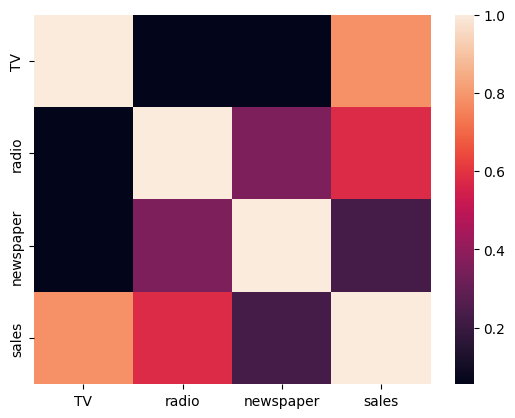

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
labels = df['sales']
features = df.drop(['sales'], axis=1)

In [ ]:
labels

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [ ]:
features

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## **Scatterplot**

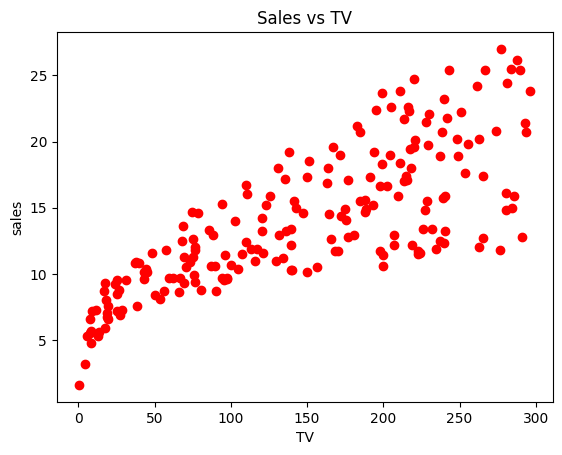

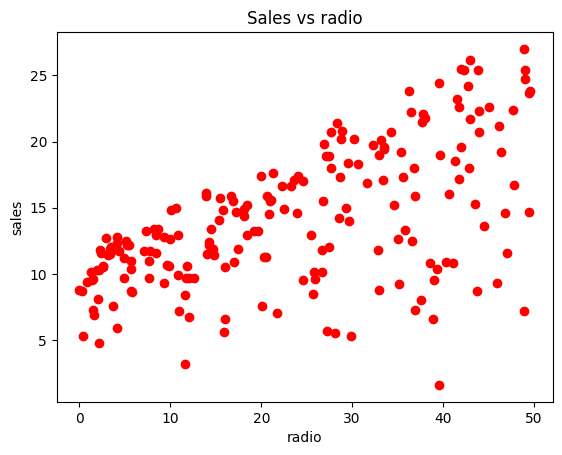

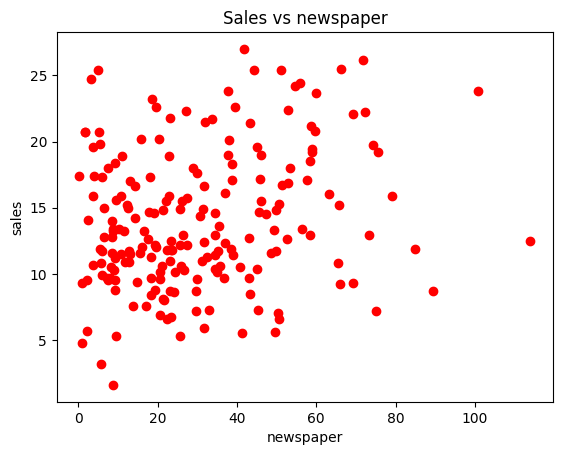

In [ ]:
for x in features:
    plt.plot(features[x],labels, 'ro')
    # 'r': Specifies the color red.
    #'o': Specifies the marker style as a circle.
    plt.title("Sales vs " + x)
    plt.xlabel(x)
    plt.ylabel("sales")
    plt.show()

## **Histogram**

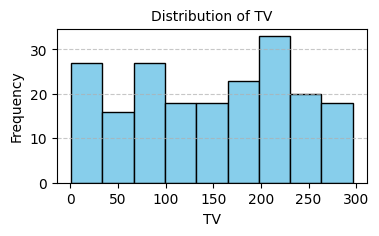

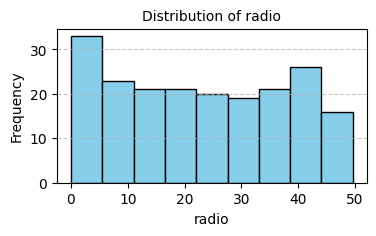

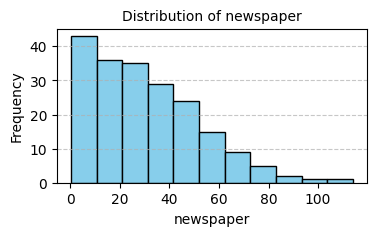

In [ ]:
for x in features:
    plt.figure(figsize=(4, 2))  # Adjust the figure size as needed

    plt.hist(features[x], bins='auto', color='skyblue', edgecolor='black')  # Histogram plot

    plt.title(f'Distribution of {x}', fontsize=10)  # Title with feature name

    plt.xlabel(x, fontsize=10)  # X-axis label
    plt.ylabel('Frequency', fontsize=10)  # Y-axis label

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

    plt.show()

# Build Model

In [ ]:
import statsmodels.formula.api as sm

# Define the formulas for the models
formula1 = "sales ~ TV + radio + newspaper"
formula2 = "sales ~ TV + radio"
formula3 = "sales ~ TV"

# Fit the models
model1 = sm.ols(formula=formula1, data=df).fit()
model2 = sm.ols(formula=formula2, data=df).fit()
model3 = sm.ols(formula=formula3, data=df).fit()

# Display model summaries
print("Model 1 Summary:")
print(model1.summary())
print("\nModel 2 Summary:")
print(model2.summary())
print("\nModel 3 Summary:")
print(model3.summary())

Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        17:23:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312   

# Conclusion

# New Section

**Model 1: sales ~ TV + radio + newspaper**

R-squared: 0.897
F-statistic: 570.3
AIC: 780.4
BIC: 793.6

sales=2.9389
+
0.0458
×
TV
+
0.1885
×
radio
−
0.0010
×
newspaper



**Model 2: sales ~ TV + radio**

R-squared: 0.897
F-statistic: 859.6
AIC: 778.4
BIC: 788.3

sales
=
2.9211
+
0.0458
×
TV
+
0.1880
×
radio
sales=2.9211+0.0458×TV+0.1880×radio

**Model 3: sales ~ TV**

R-squared: 0.612
F-statistic: 312.1
AIC: 1042.0
BIC: 1049.0

sales
=
7.0326
+
0.0475
×
TV
sales=7.0326+0.0475×TV

Based on these metrics, Model 2 appears to be the best fit among the three models. It has the highest R-squared value, a high F-statistic, and lower AIC and BIC values compared to the other models. Model 2 includes TV and radio as predictor variables, and its simplicity (fewer predictors) is often preferred unless adding additional predictors significantly improves model performance.

